In [1]:
import glob

import pandas as pd
from matplotlib import pyplot as plt

In [2]:
# Display all the rows of a pandas data frame
pd.set_option("display.max_rows", None)

# Customize the pyplot figure
plt.rcParams.update(
    {"figure.figsize": (12, 9), "font.size": 15, "grid.linestyle": "dotted"}
)

# Get the pyplot default color cycle
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

# Set telescope combination names
combo_names = {12: "LST1 + M1", 13: "LST1 + M2"}

# Find input files

In [3]:
# ================
# === Settings ===
# ================

input_file_mask = (
    "/home/evisentin/dataout_magic_lst/dl1/data/coincidence/lst_single_run_stereo/run_03265/"
)

# ============
# === Main ===
# ============

input_files = glob.glob(input_file_mask)
input_files.sort()

n_files = len(input_files)

print(f"Input file mask: {input_file_mask}")
print(f"\nIn total {n_files} files are found.")

Input file mask: /home/yoshiki.ohtani/lstmagic/real/CrabNebula/2020_12_15/2.event_coincidence/data/coincidence/*Run03265.*.h5

In total 91 files are found.


# Load the first input file

In [4]:
input_file = input_files[0]
print(f"Input file: {input_file}")

# Load the coincidnece features
features = pd.read_hdf(input_file, key="coincidence/feature")

# Load the coincidence profiles
profiles = pd.read_hdf(input_file, key="coincidence/profile")

Input file: /home/yoshiki.ohtani/lstmagic/real/CrabNebula/2020_12_15/2.event_coincidence/data/coincidence/dl1_LST-1_MAGIC.Run03265.0004.h5


In [5]:
features

,coincidence_id,window_half_width,unix_time,pointing_alt_lst,pointing_az_lst,pointing_alt_magic,pointing_az_magic,average_offset,n_coincidence,n_events_magic
0,12,300,1.608068e+09,0.699347,1.467619,0.699262,1.467630,-3.367,1175,1492
1,13,300,1.608068e+09,0.699339,1.467615,0.699233,1.467627,-3.240,1272,1627


In [6]:
profiles

,time_offset,n_coincidence_tel12,n_coincidence_tel13
0,-5.0,0,0
1,-4.9,0,0
2,-4.8,0,0
3,-4.7,0,1
4,-4.6,0,1
5,-4.5,0,1
6,-4.4,0,1
7,-4.3,0,1
8,-4.2,0,1
9,-4.1,0,1


# Load all the input files

In [7]:
print("Loading the input files...")

data_list = []

for i_file, input_file in enumerate(input_files):

    if i_file % 10 == 0:
        print(f"{i_file}/{n_files}")

    # Load the coincidence features
    df = pd.read_hdf(input_file, key="coincidence/feature")
    data_list.append(df)

print(f"{n_files}/{n_files}")

# Combine the data frames
features = pd.concat(data_list)

# Show the data frame
features.head()

Loading the input files...
0/91
10/91
20/91
30/91
40/91
50/91
60/91
70/91
80/91
90/91
91/91


,coincidence_id,window_half_width,unix_time,pointing_alt_lst,pointing_az_lst,pointing_alt_magic,pointing_az_magic,average_offset,n_coincidence,n_events_magic
0,12,300,1.608068e+09,0.699347,1.467619,0.699262,1.467630,-3.367,1175,1492
1,13,300,1.608068e+09,0.699339,1.467615,0.699233,1.467627,-3.240,1272,1627
0,12,300,1.608068e+09,0.699874,1.467874,0.699789,1.467881,-3.366,1171,1513
1,13,300,1.608068e+09,0.699876,1.467876,0.699777,1.467883,-3.238,1261,1618
0,12,300,1.608068e+09,0.700434,1.468124,0.700365,1.468143,-3.363,1223,1584


# Check the average offset

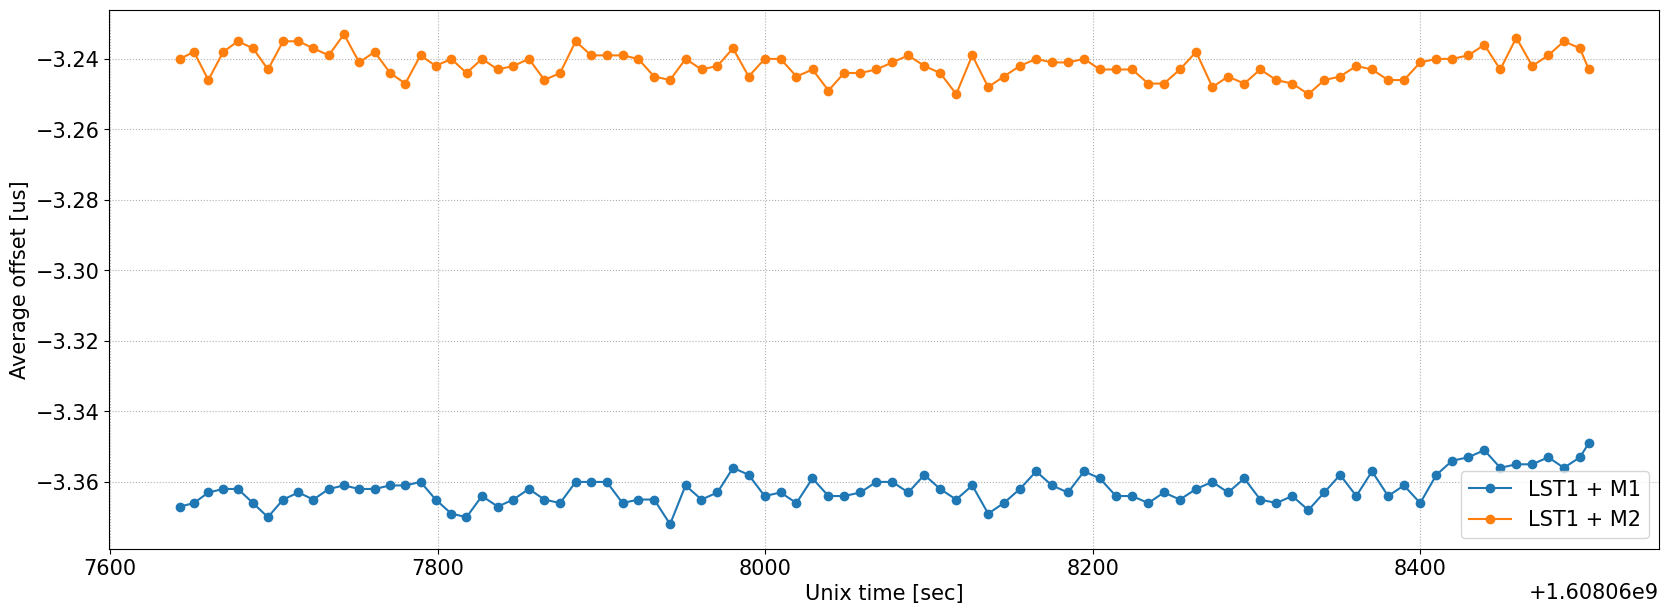

In [8]:
plt.figure(figsize=(20, 7))
plt.xlabel("Unix time [sec]")
plt.ylabel("Average offset [us]")
plt.grid()

# Loop over every coincidence ID
for coinc_id, combo_name in combo_names.items():

    df_features = features.query(f"coincidence_id == {coinc_id}")

    # Plot the average offset
    plt.plot(
        df_features["unix_time"],
        df_features["average_offset"],
        marker="o",
        label=combo_name,
    )

plt.legend()

# Check the number of coincident events

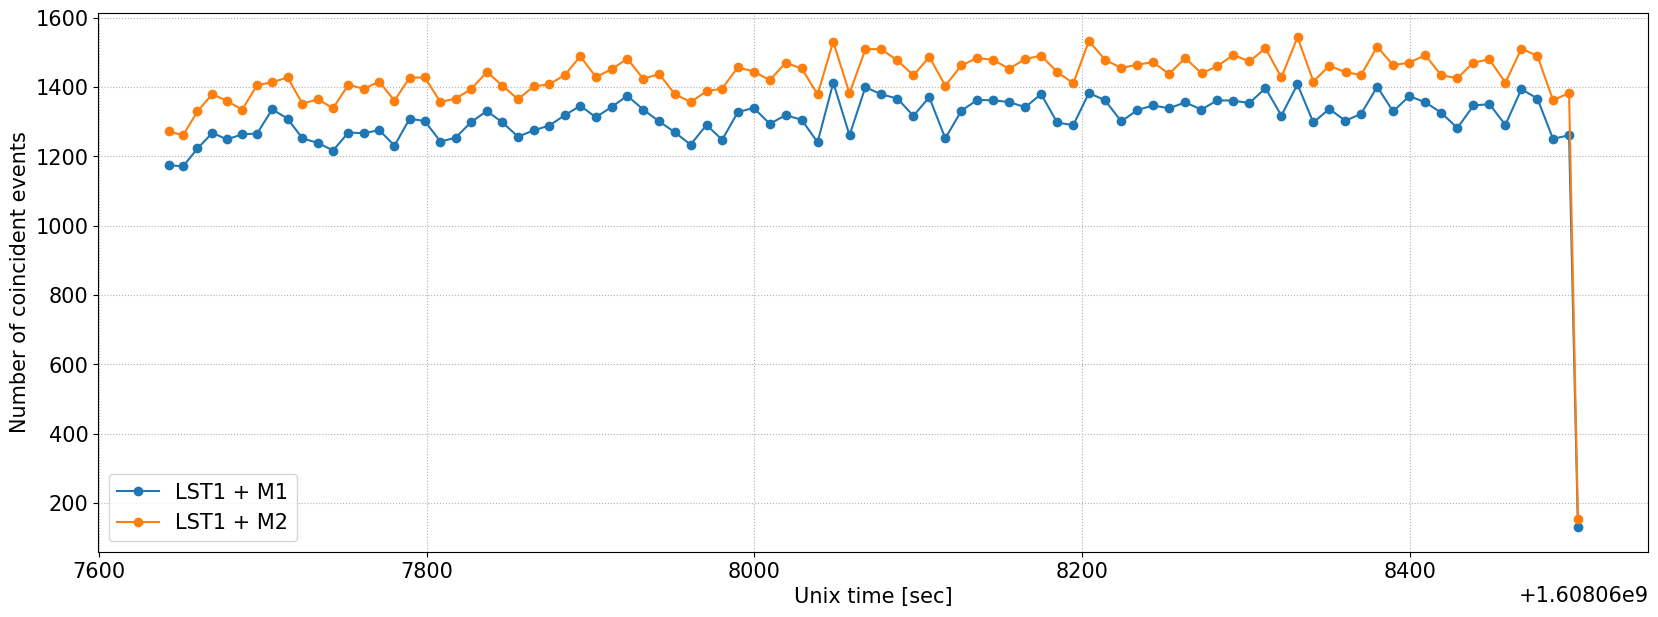

In [9]:
plt.figure(figsize=(20, 7))
plt.xlabel("Unix time [sec]")
plt.ylabel("Number of coincident events")
plt.grid()

# Loop over every coincidence ID
for coinc_id, combo_name in combo_names.items():

    df_features = features.query(f"coincidence_id == {coinc_id}")

    # Plot the number of coincident events
    plt.plot(
        df_features["unix_time"],
        df_features["n_coincidence"],
        marker="o",
        label=combo_name,
    )

plt.legend()

# Check the fraction of coincidence

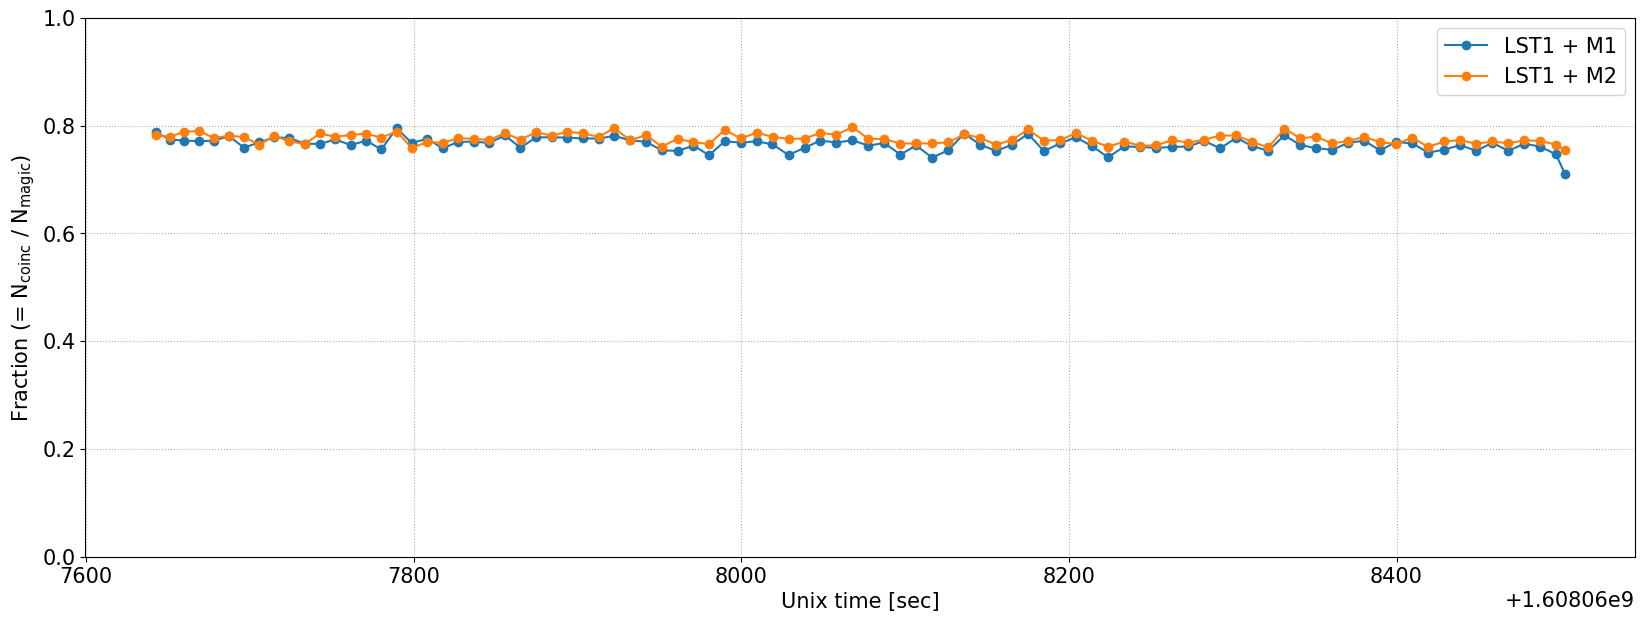

In [10]:
plt.figure(figsize=(20, 7))
plt.xlabel("Unix time [sec]")
plt.ylabel("Fraction (= N$_\mathrm{coinc}$ / N$_\mathrm{magic}$)")
plt.ylim(0, 1)
plt.grid()

# Loop over every coincidence ID
for coinc_id, combo_name in combo_names.items():

    df_features = features.query(f"coincidence_id == {coinc_id}")
    fractions = df_features["n_coincidence"] / df_features["n_events_magic"]

    # Plot the fraction of coincidence
    plt.plot(df_features["unix_time"], fractions, marker="o", label=combo_name)

plt.legend()